<h1 align = 'center'> Polynomial regression </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Generate Data

In [2]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 *X + 2 + np.random.rand(200,1) #0.8X^2 + 0.9^X  + 2


In [3]:
X

array([[ 1.97331368],
       [ 2.46892148],
       [ 2.4429361 ],
       [-1.92697669],
       [ 1.55575942],
       [ 1.00364292],
       [-0.92291021],
       [-1.64508993],
       [-0.6456832 ],
       [-0.43114808],
       [-1.57543001],
       [-2.38210574],
       [ 2.13416762],
       [ 1.50951205],
       [-1.16929207],
       [-2.21817089],
       [-0.09689175],
       [-2.05333285],
       [ 2.21041027],
       [-1.79449034],
       [ 2.73272696],
       [ 0.59363233],
       [-0.79280821],
       [ 2.48346499],
       [-1.23346052],
       [-0.45937263],
       [-0.9275821 ],
       [-2.98046449],
       [ 1.00883794],
       [ 2.47010901],
       [ 0.5328419 ],
       [ 2.48281347],
       [ 1.52699804],
       [ 2.75776927],
       [-0.38093122],
       [ 0.2441539 ],
       [ 1.17778811],
       [-0.03772438],
       [ 1.96263507],
       [-0.99360605],
       [-0.91790325],
       [-2.81466243],
       [ 2.62800582],
       [ 0.70223473],
       [-0.22638877],
       [-0

In [4]:
y

array([[ 7.5212426 ],
       [ 9.58182572],
       [ 9.02853269],
       [ 4.01500996],
       [ 5.76213736],
       [ 4.31293183],
       [ 2.01396247],
       [ 2.95764298],
       [ 2.62633445],
       [ 2.0394639 ],
       [ 2.62254028],
       [ 4.82337959],
       [ 8.37275313],
       [ 5.80483235],
       [ 2.48143982],
       [ 4.56018463],
       [ 2.23162379],
       [ 4.40866614],
       [ 8.77168894],
       [ 3.93625083],
       [10.97421836],
       [ 3.44638776],
       [ 1.80172943],
       [ 9.5077661 ],
       [ 2.75363415],
       [ 2.2220558 ],
       [ 2.12242235],
       [ 6.93359029],
       [ 4.35986047],
       [ 9.76264565],
       [ 3.56804992],
       [ 9.18354055],
       [ 5.83011819],
       [10.68958045],
       [ 2.3325081 ],
       [ 3.23259619],
       [ 4.44213475],
       [ 2.70775903],
       [ 7.11481706],
       [ 2.69793276],
       [ 2.21441201],
       [ 6.09902104],
       [10.23478186],
       [ 3.46295876],
       [ 2.02020737],
       [ 2

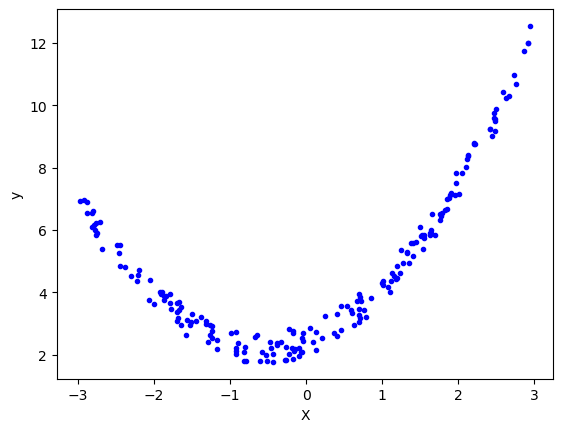

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

### Using Simple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

### Performance metrics

In [11]:
from sklearn.metrics import r2_score

In [12]:
print("r2_score of Linear Regression = ", r2_score(y_test,y_pred))

r2_score of Linear Regression =  0.4277547543221162


### Visualisation of Linear Regression

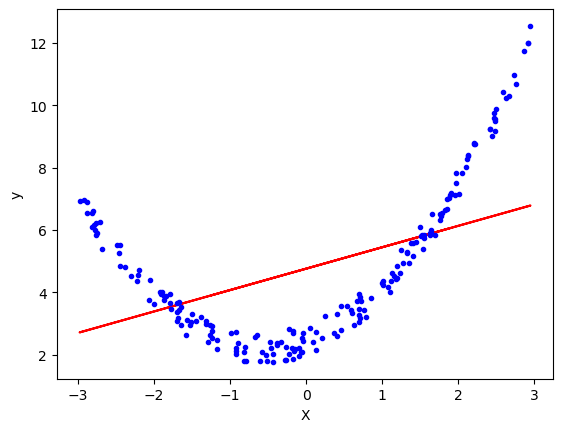

In [13]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Using Polynomial Linear Regression

In [14]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

> __Data__ ----> __Ploynomial Tx__ ----> __Linear Regression__ ----> __Prediction__

#### For Degree 2

In [17]:
poly = PolynomialFeatures(degree=2) # if we don't want to include bias set include_bias= False

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [18]:
print(X_train[0])
print(X_train_trans[0])

[1.88208846]
[1.         1.88208846 3.54225696]


### Model training

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train_trans,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test_trans)

In [24]:
print('r2_score for Polynoial Regression is = ', r2_score(y_test,y_pred))

r2_score for Polynoial Regression is =  0.9915215807806118


In [29]:
print("Coefieent = ", model.coef_) ##0.8X^2 + 0.9^X  + 2
print(" Intercept = ", model.intercept_)  

Coefieent =  [[0.         0.87868936 0.81378703]]
 Intercept =  [2.47278653]


### Visualization of Polynomial Regression

In [31]:
X_new = np.linspace(-3, 3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = model.predict(X_new_poly)

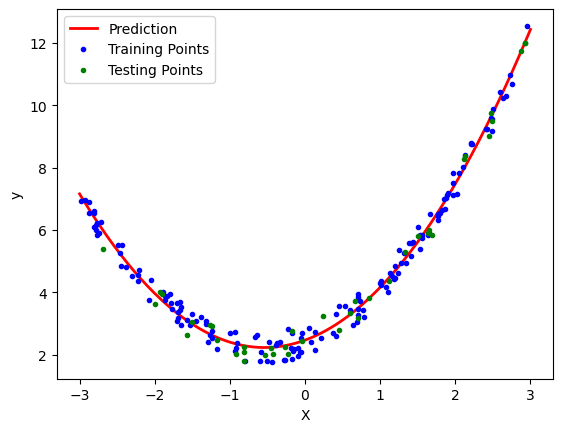

In [34]:
plt.plot(X_new,y_new, "r-" ,linewidth=2, label ="Prediction")
plt.plot(X_train,y_train,'b.', label="Training Points")
plt.plot(X_test,y_test,'g.', label="Testing Points")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Polynomial for N Degree

In [38]:
from sklearn.pipeline import Pipeline 

In [39]:
def Polynomial_regression(degree):
    X_new = np.linspace(-3, 3,100).reshape(100,1)
    X_new_poly = poly.transform(X_new)
    polybig_feature = PolynomialFeatures(degree=degree, include_bias= False)
    std_scalar = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("polybig_feature ",polybig_feature ),
        ("std_scalar",std_scalar),
        ("lin_reg",lin_reg),
    ])
    
    polynomial_regression.fit(X,y)
    y_new_big = Polynomial_regression.predict(X_new)
    
    plt.plot(X_new,y_new_big, "r" ,linewidth=2, label ="Degree" + str(degree))
    plt.plot(X_train,y_train,'b.', linewidth =3)
    plt.plot(X_test,y_test,'g.', linewidth=3)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.axis([-3,3,0,10])
    plt.show()

In [40]:
Polynomial_regression(55)

AttributeError: 'function' object has no attribute 'predict'